# Boston House Prices

In [2]:
from IPython.display import Image
Image(url= "https://cdn10.bostonmagazine.com/wp-content/uploads/sites/2/2020/03/back-bay-brownstone.jpg", width=800, height=800)

In [40]:
# Importing the libraries 
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [41]:
# Importing the Boston Housing dataset
from sklearn.datasets import load_boston
boston = load_boston()

In [42]:
# Initializing the dataframe
my_data = pd.DataFrame(boston.data)

In [43]:
my_data.columns = boston.feature_names
my_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [44]:
my_data['MEDV'] = boston.target 
my_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [45]:
my_data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [46]:
my_data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [47]:
#We can use the shape attribute to check how large the resulting DataFrame is
my_data.shape

(506, 14)

In [48]:
my_data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [49]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [50]:
#Viewing the data statistics
my_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [51]:
my_data.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

nunique(): this helps us to identify if a column is categorical or continuous.

CRIM - Continuous. 
ZN - Continuous. 
INDUS - Continuous. 
CHAS - Categorical. 
NOX - Continuous. 
RM - Continuous. 
AGE - Continuous.
DIS - Continuous. 
RAD - Categorical. 
TAX - Continuous. 
PTRATIO - Continuous. 
B - Continuous. 
LSTAT - Continuous. 
MEDV - Continuous.
We have 2 categorical columns: 'CHAS', 'RAD'
Other columns are continuous.

# Preprocessing the dataset

In [14]:
# Check for missing values
my_data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

No missing values in this data!!

In [15]:
# See rows with missing values
my_data[my_data.isnull().any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


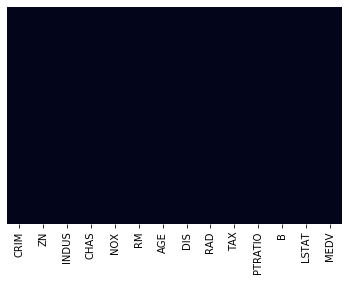

In [16]:
# Checking the null values using heatmap
# There is any null values are occupyed here
sns.heatmap(my_data.isnull(),yticklabels=False,cbar=False)

# Exploratory Data Analysis (EDA)

In [17]:
# Spliting target variable and independent variables
X = my_data.drop(['MEDV'], axis = 1)
y = my_data['MEDV']

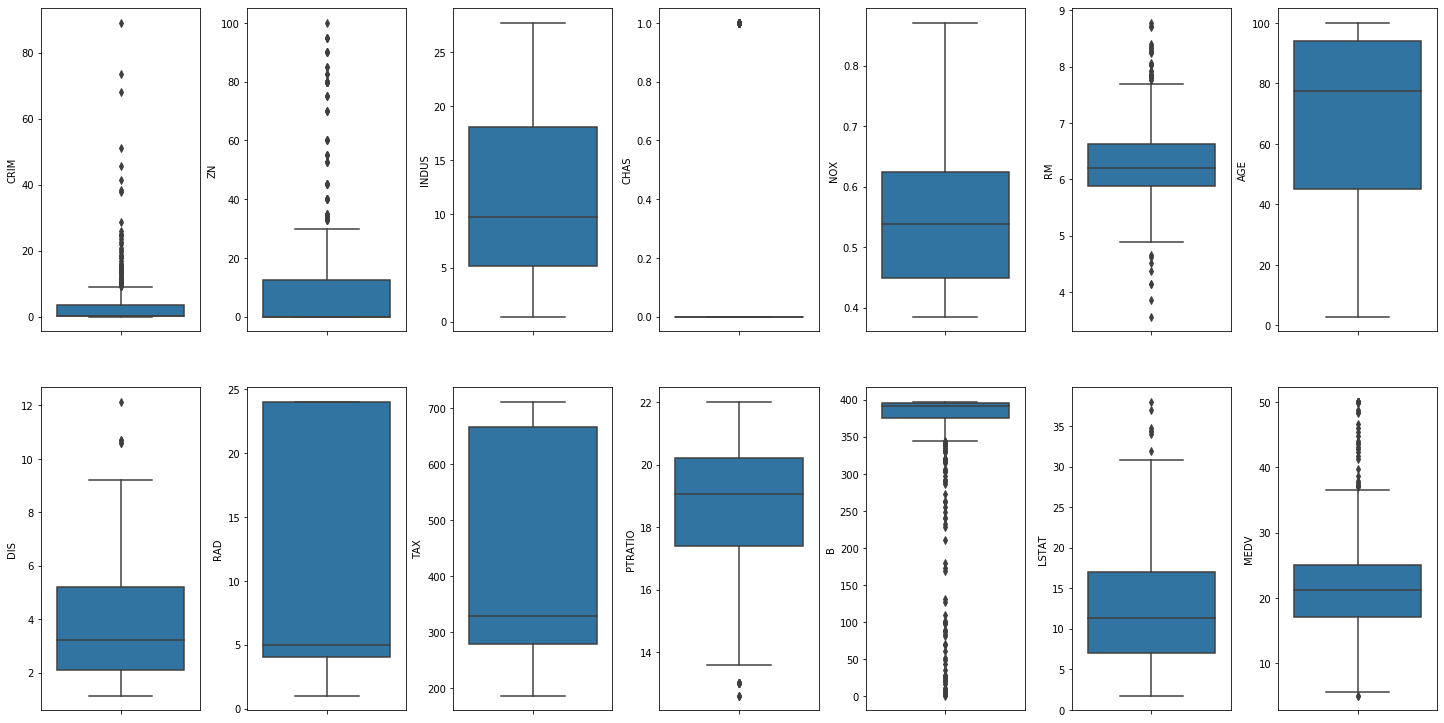

In [18]:
# create box plots
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in my_data.items():
    sns.boxplot(y=col, data=my_data, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [19]:
for k, v in my_data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(my_data)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


In [21]:
y.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

In [22]:
my_data = my_data[~(y >= 50.0)]
print(np.shape(my_data))
my_data.reset_index(inplace=True)

(490, 14)


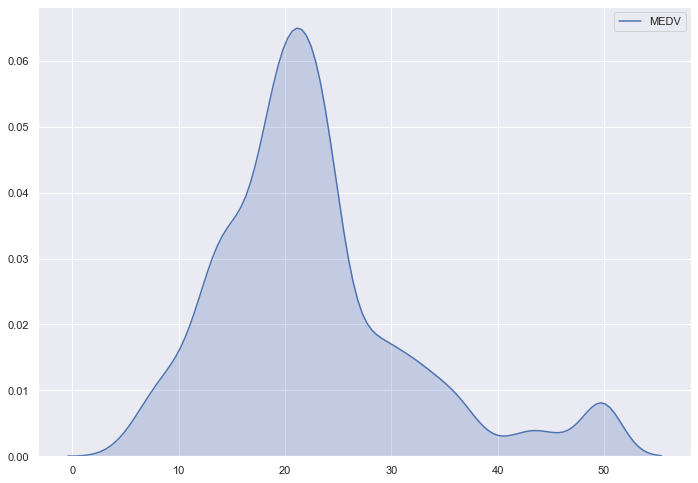

In [309]:
#kernel density estimation
sns.kdeplot(y, shade = True)

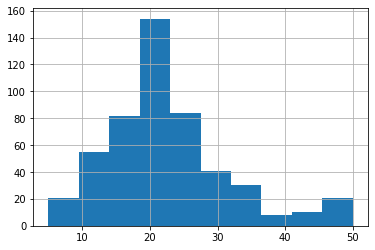

In [23]:
y.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D1AAFD1988>,
      dtype=object)

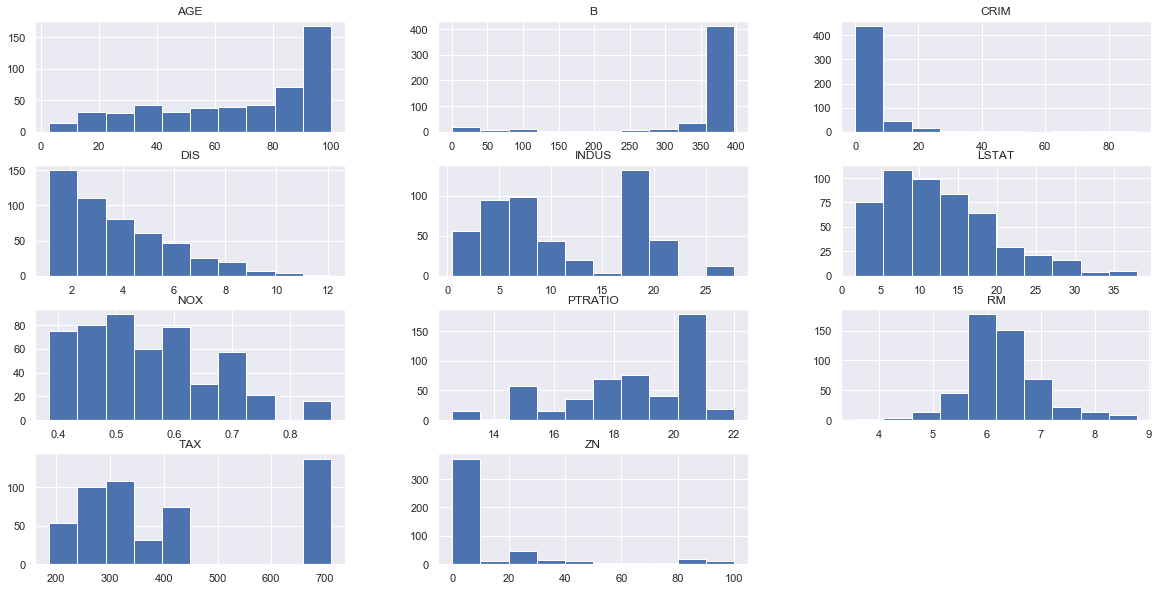

In [52]:
X.hist(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX',
                 'PTRATIO', 'B', 'LSTAT'], figsize=(20,10))

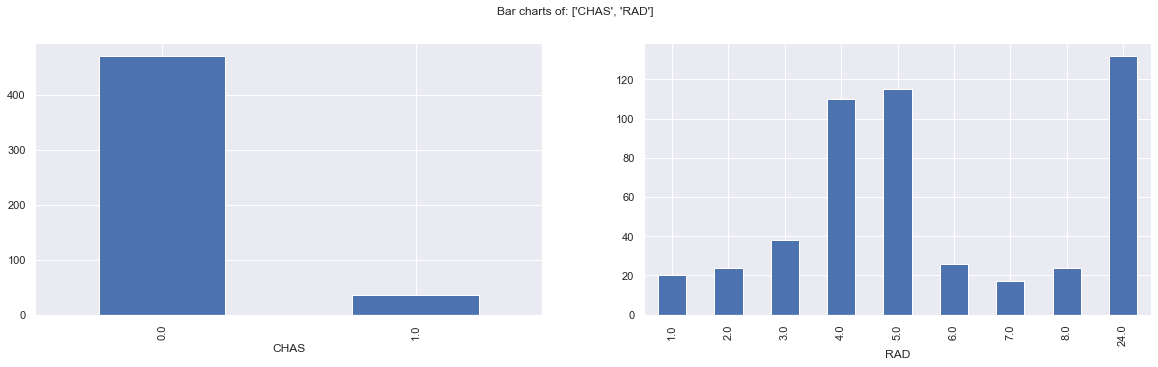

In [53]:
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

# Calling the function
PlotBarCharts(inpData=my_data, colsToPlot=['CHAS','RAD'])

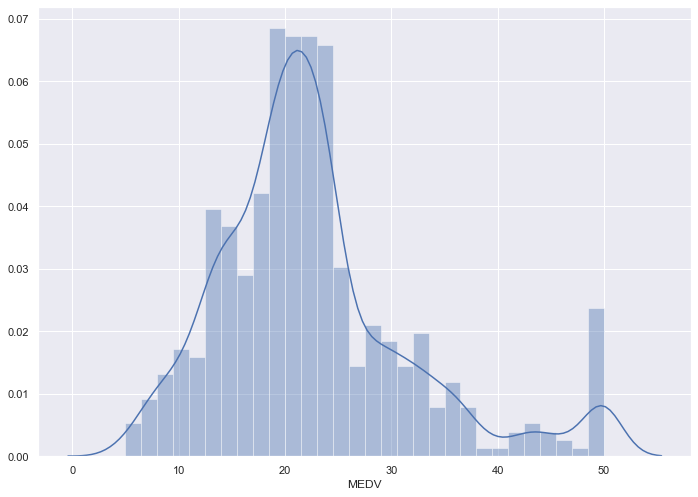

In [25]:
#Checking distribution of the target variable
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(y, bins=30)
plt.show()

MEDV is Deviated from the normal distribution, have appreciable positive skewness and showed peakedness

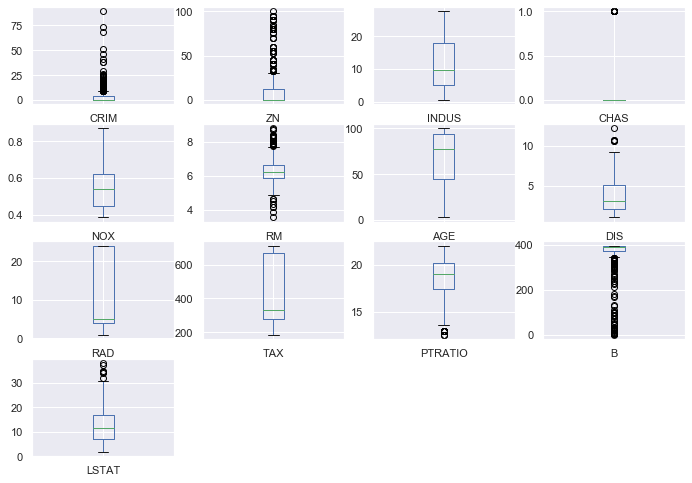

In [26]:
from matplotlib import pyplot
X.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False)
pyplot.show()

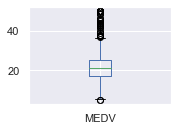

In [279]:
y.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False)
pyplot.show()

#  Min-Max Normalization

In [27]:
cols = ['RM', 'PTRATIO', 'LSTAT']
for col in cols:
    # find minimum and maximum of that column
    minimum = min(my_data[col])
    maximum = max(my_data[col])
    my_data[col] = (my_data[col] - minimum) / (maximum - minimum)

# Coorelation Matrix

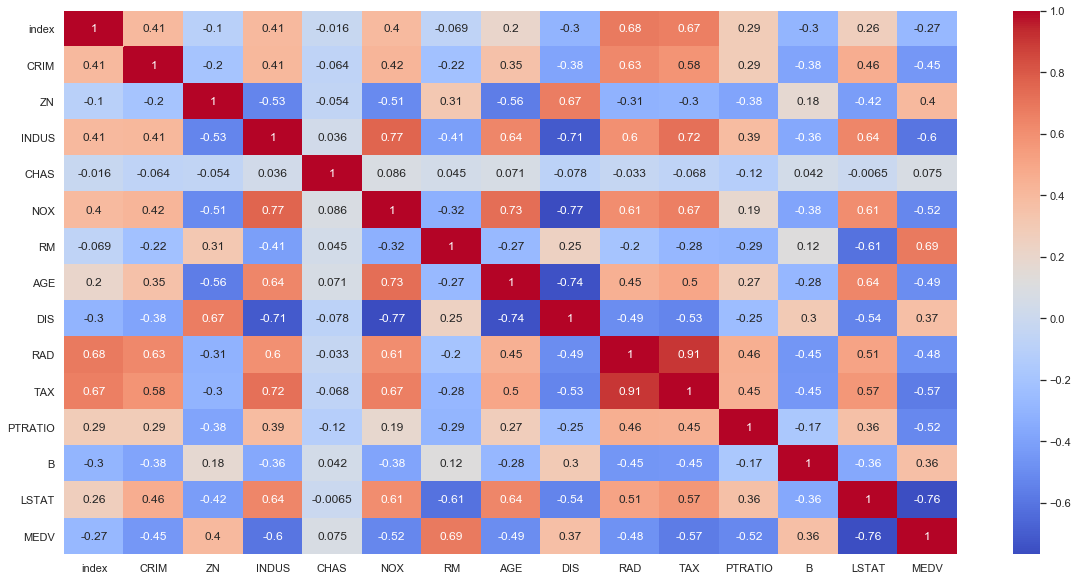

In [29]:
# Finding out the correlation between the features
corr = my_data.corr()
# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

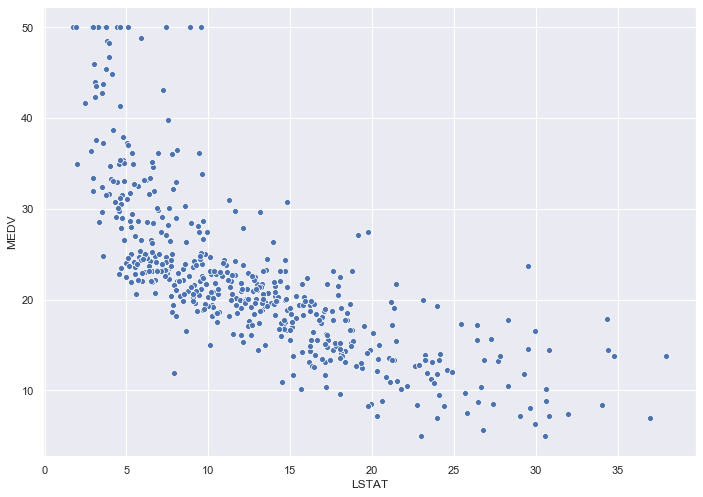

In [30]:
sns.scatterplot(y=y, x=X['LSTAT'])

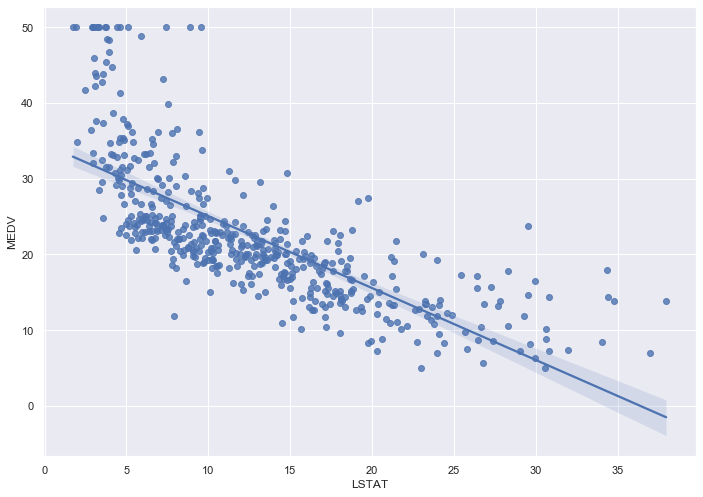

In [31]:
sns.regplot(y=y, x=X['LSTAT'])

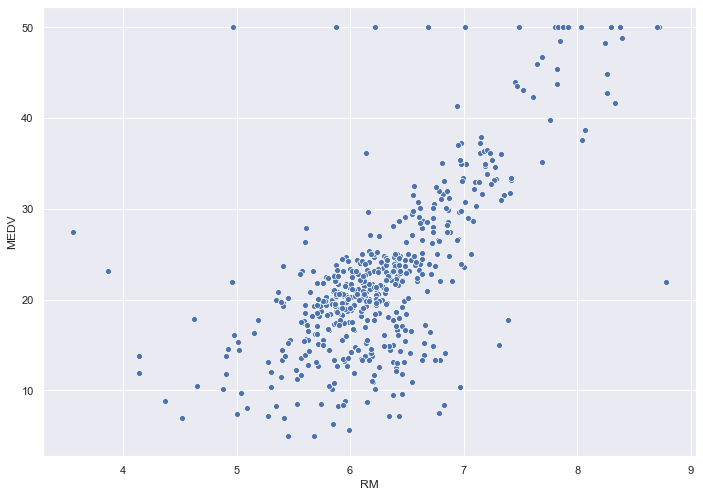

In [32]:
sns.scatterplot(y=y, x=X['RM'])

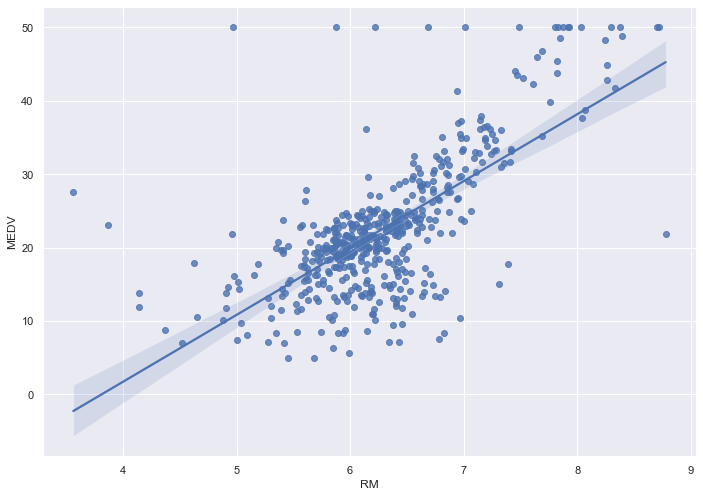

In [33]:
sns.regplot(y=y, x=X['RM'])

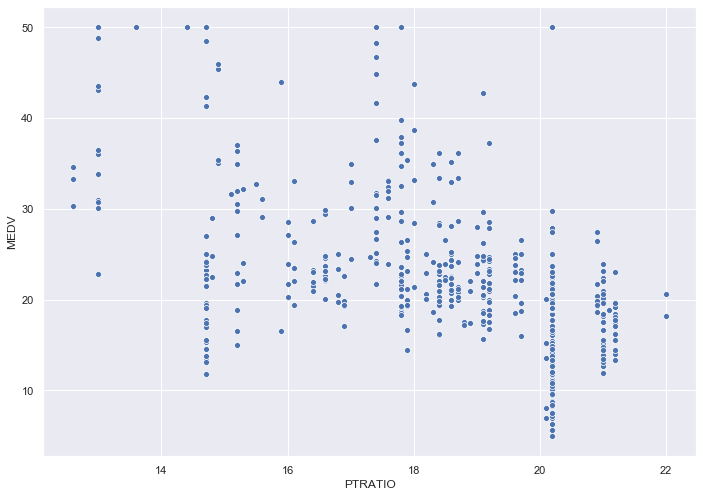

In [34]:
sns.scatterplot(y=y, x=X['PTRATIO'])

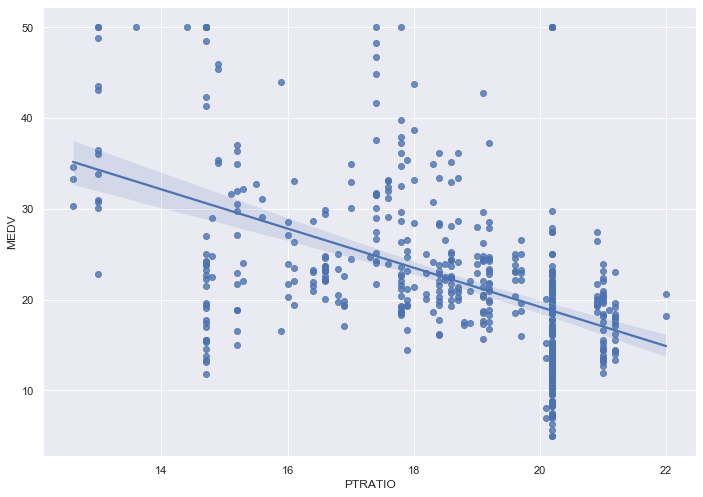

In [35]:
sns.regplot(y=y, x=X['PTRATIO'])

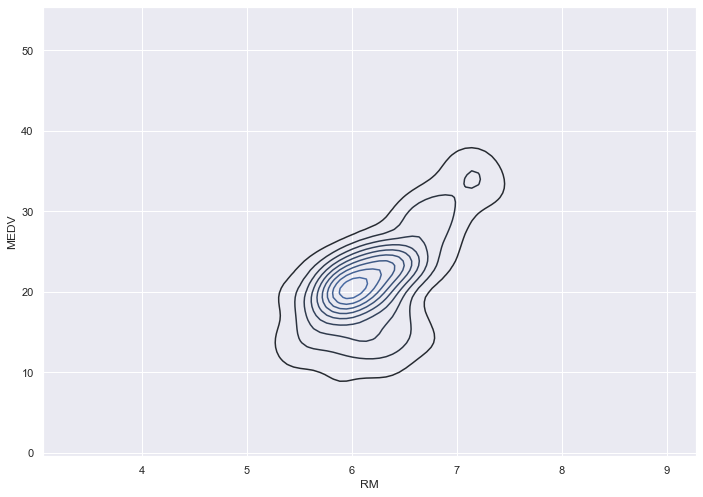

In [36]:
sns.kdeplot(X['RM'], y)

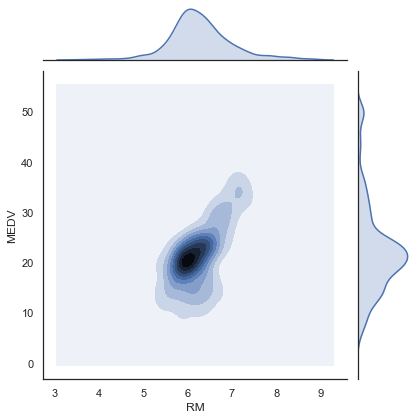

In [37]:
with sns.axes_style("white"):
    sns.jointplot(x = X['RM'], y = y,
              kind = "kde" )

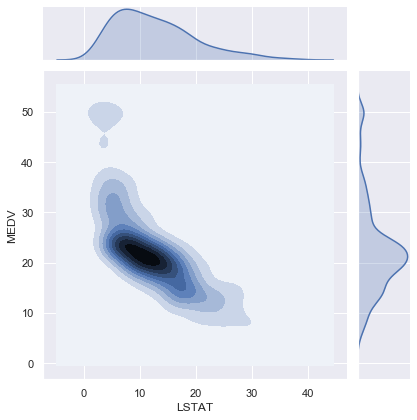

In [38]:
sns.jointplot(x = X['LSTAT'], y = y,
              kind = "kde" )

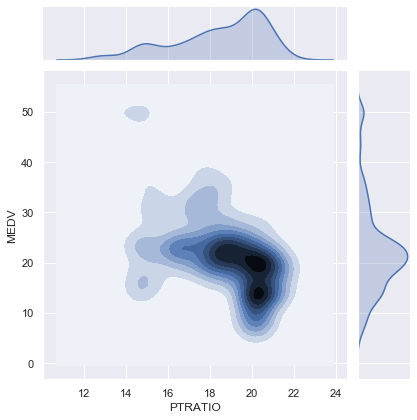

In [290]:
sns.jointplot(x = X['PTRATIO'], y = y,
              kind = "kde" )

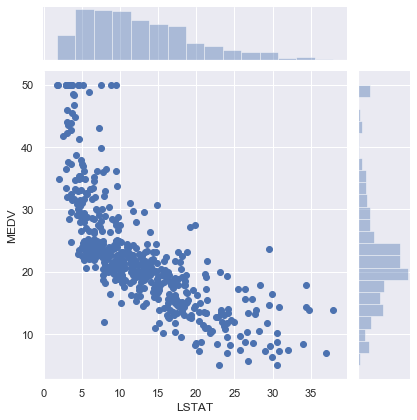

In [291]:
sns.jointplot( x=X['LSTAT'], y=y, kind="scatter")

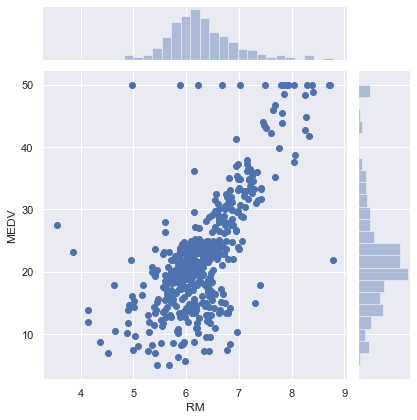

In [292]:
sns.jointplot( x=X['RM'], y=y, kind="scatter")

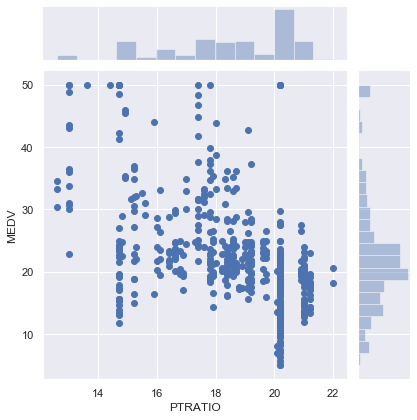

In [293]:
sns.jointplot( x=X['PTRATIO'], y=y, kind="scatter")

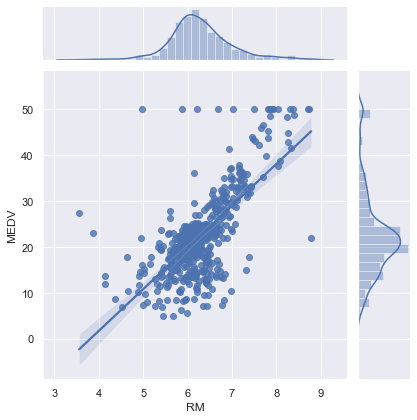

In [294]:
sns.jointplot( x=X['RM'], y=y, kind="reg")

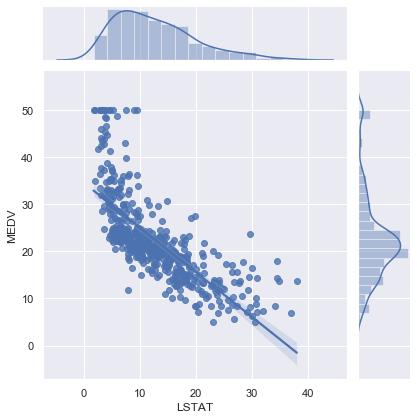

In [295]:
sns.jointplot( x=X['LSTAT'], y=y, kind="reg")

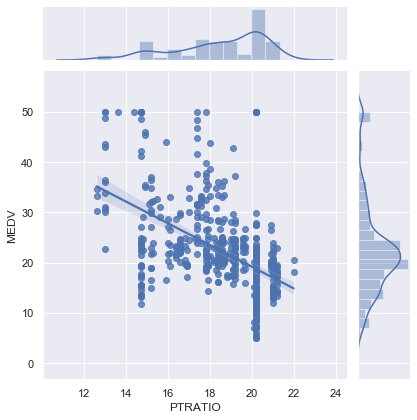

In [296]:
sns.jointplot( x=X['PTRATIO'], y=y, kind="reg")

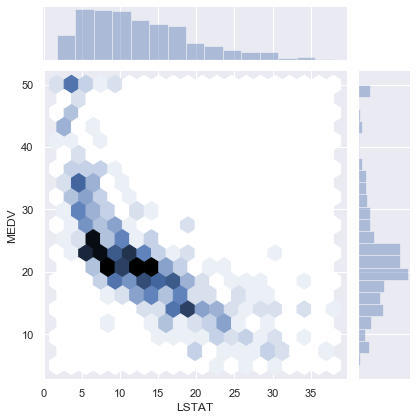

In [298]:
sns.jointplot( x=X['LSTAT'], y=y, kind="hex")

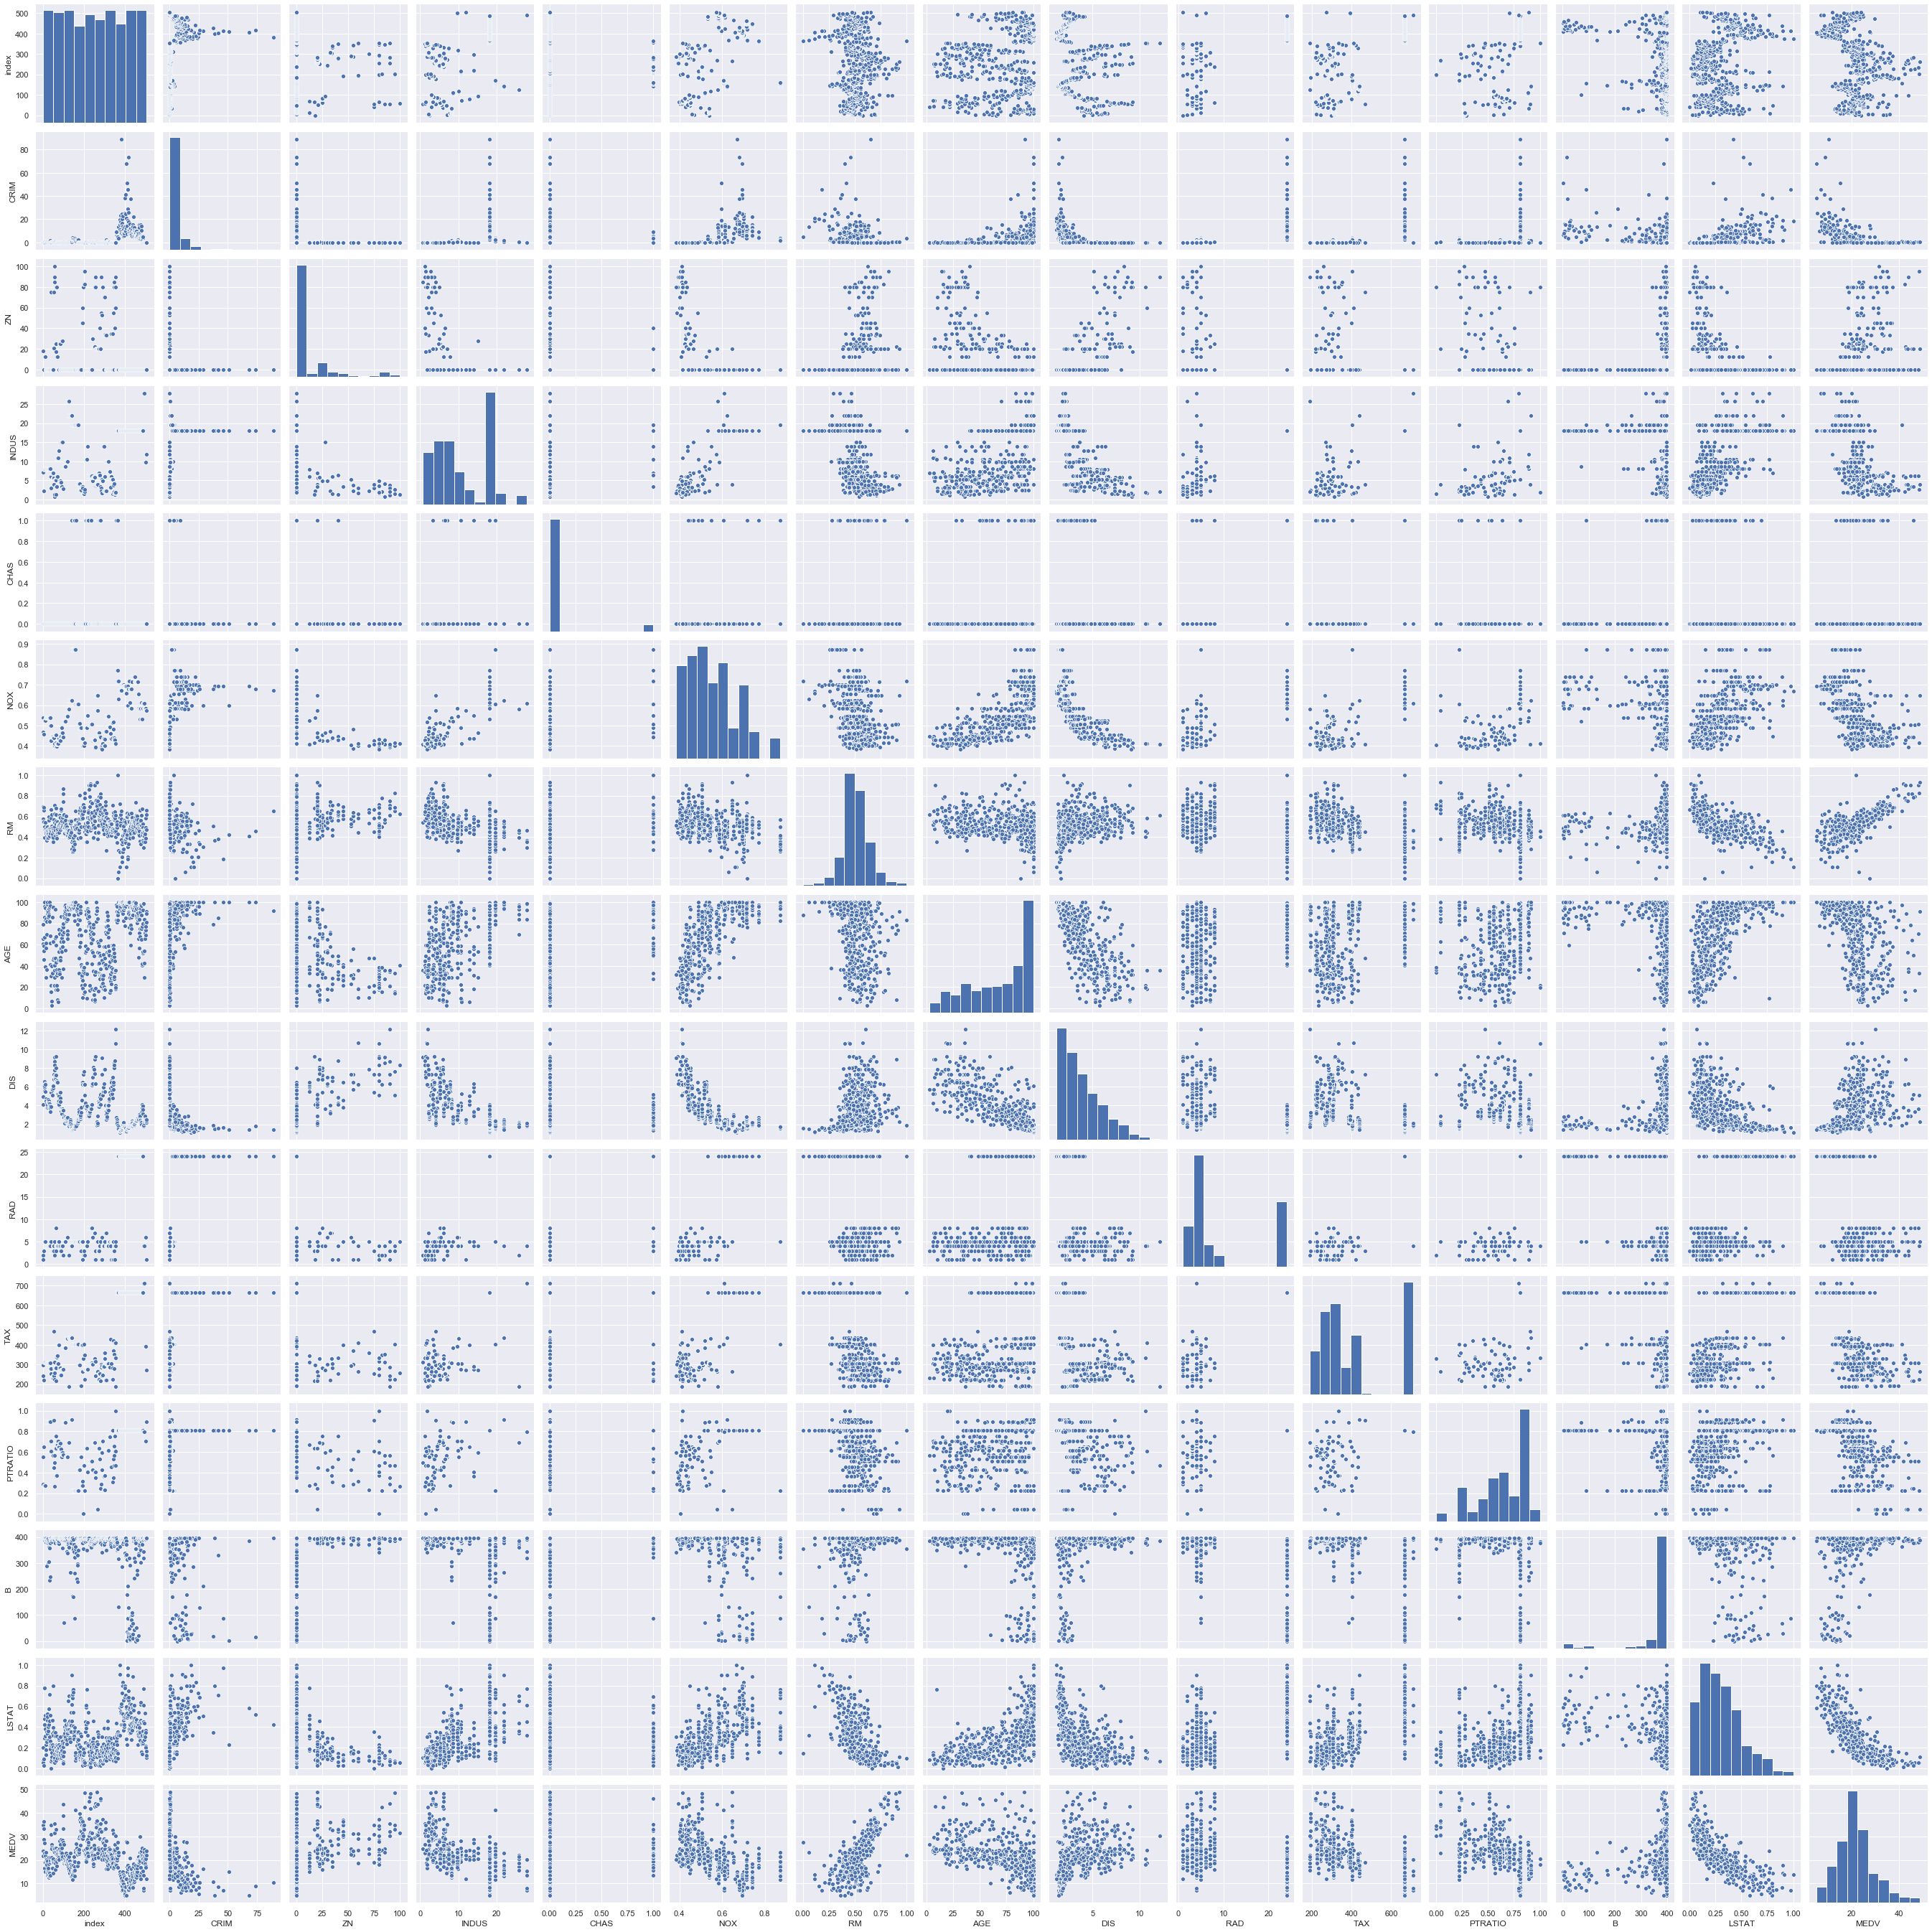

In [204]:
# Calculate and show pairplot
sns.pairplot(my_data, size=2.5)
plt.tight_layout()

# Train Test Split

In [301]:
# Splitting to training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

# Linear Regression

Model training

In [302]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lr = LinearRegression()

# Train the model using the training sets 
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Model Evaluation

In [303]:
y_pred = lr.predict(X_train)
# Model Evaluation
from sklearn import metrics
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.7465991966746854
Adjusted R^2: 0.736910342429894
MAE: 3.08986109497113
MSE: 19.07368870346903
RMSE: 4.367343437774162


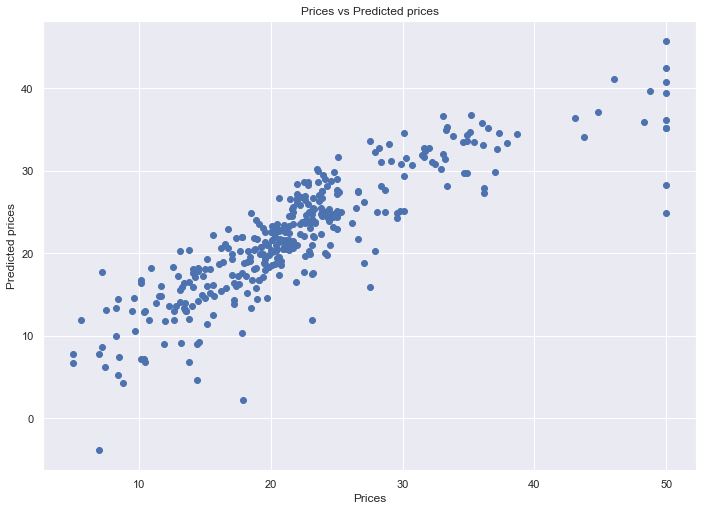

In [113]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

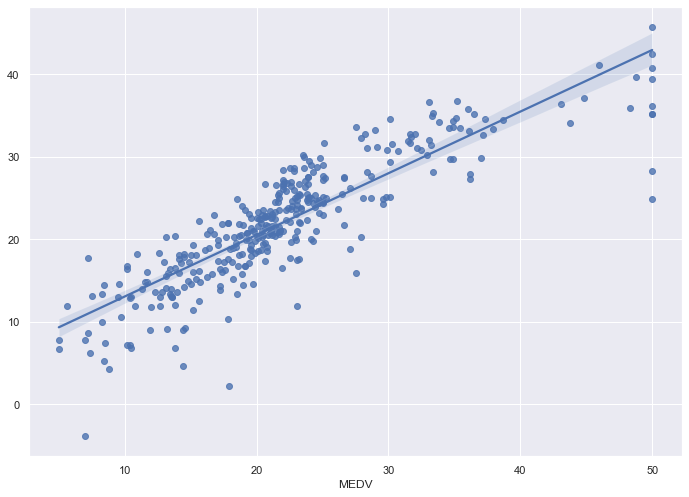

In [114]:
sns.regplot(y_train, y_pred)

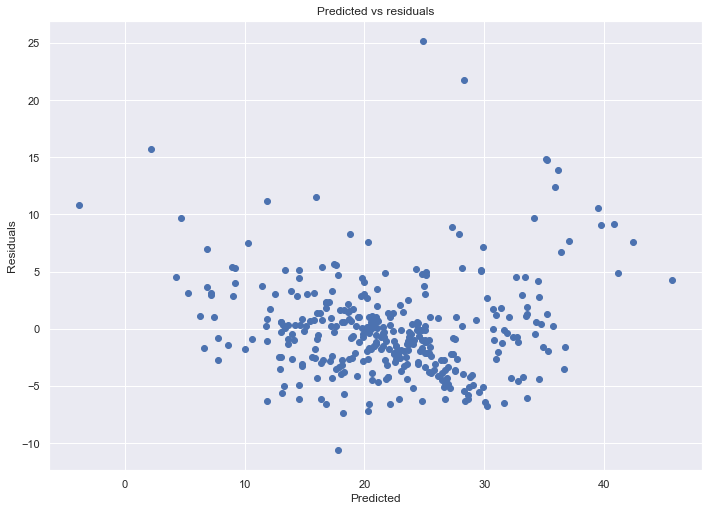

In [342]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

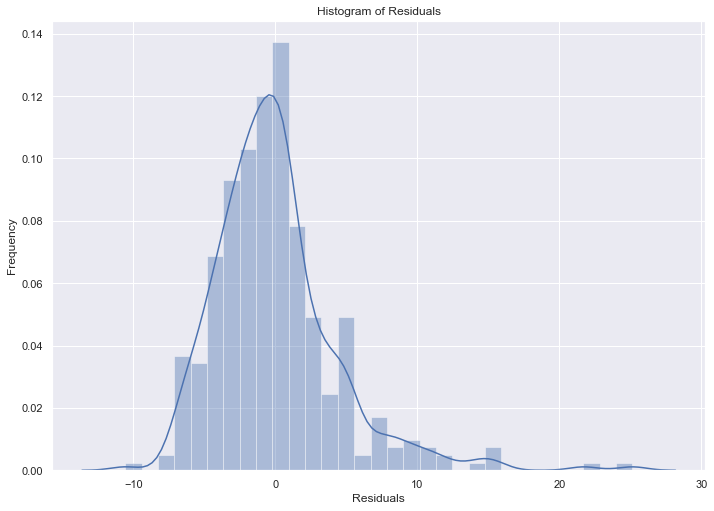

In [347]:
# Checking Normality of errors
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

Here the residuals are normally distributed. So normality assumption is satisfied

For test data

In [115]:
# Predicting Test data with the model
y_test_pred = lm.predict(X_test)
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.7121818377409195
Adjusted R^2: 0.6850685326005713
MAE: 3.8590055923707407
MSE: 30.053993307124127
RMSE: 5.482152251362974


# Random Forest Regressor

Model training

In [349]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
# Create a Random Forest Regressor
reg = RandomForestRegressor()
# Train the model using the training sets 
reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Model evaluation

In [350]:
# Model prediction on train data
y_pred = reg.predict(X_train)
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9788222147510954
Adjusted R^2: 0.9780124759033432
MAE: 0.8511836158192098
MSE: 1.5940694661016963
RMSE: 1.2625646383855744


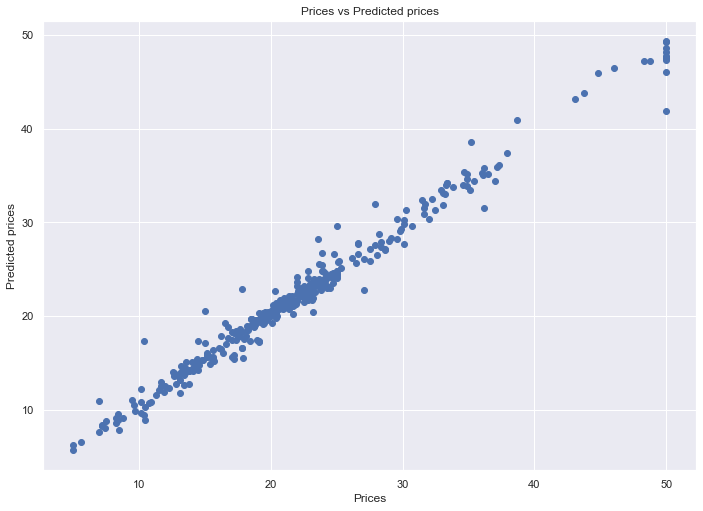

In [120]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

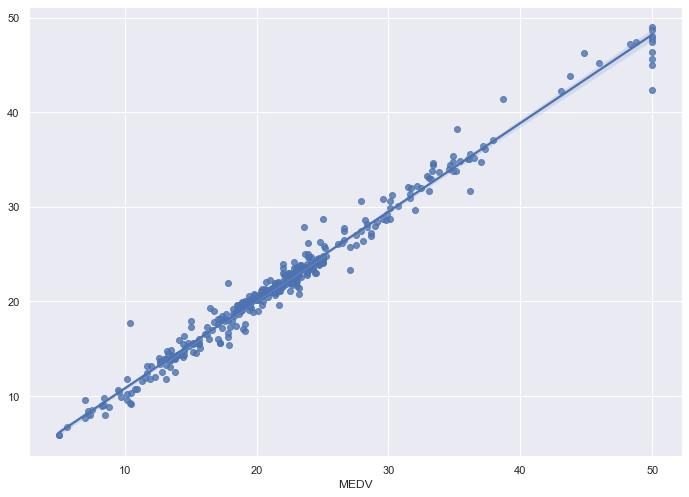

In [351]:
sns.regplot(y_train, y_pred)

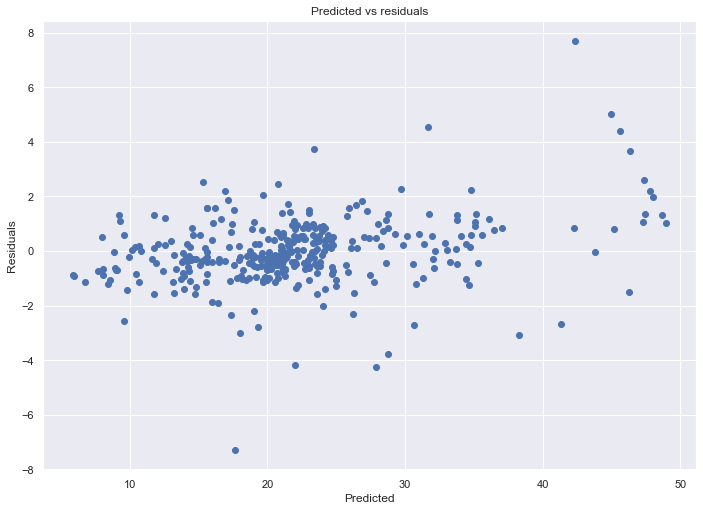

In [352]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

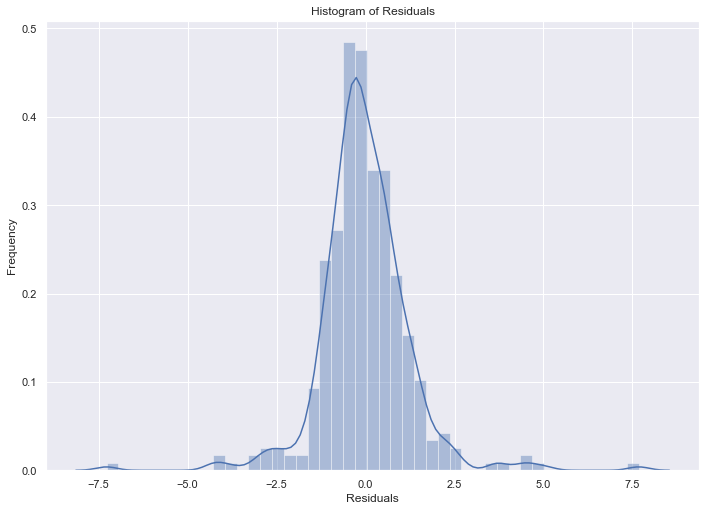

In [353]:
# Checking Normality of errors
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

Residuals are normally distributed

For test data

In [354]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)
# Model Evaluation
acc_rf = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.8242641476843303
Adjusted R^2: 0.8077093210169122
MAE: 2.5296118421052625
MSE: 18.350350401315794
RMSE: 4.283730897397244


# Comparing the models

In [355]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'R-squared Score': [acc_linreg*100, acc_rf*100, ]})
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score
1,Random Forest,82.426415
0,Linear Regression,71.218184
